<a href="https://colab.research.google.com/github/asokraju/Titanic/blob/master/Titanic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, log_loss

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
#warnings.filterwarnings('ignore')

In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [0]:
print("A sample of TRAIN data ")
print(train.head())

A sample of TRAIN data 
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.

In [0]:
print("A sample of TEST data ")
print(train.head())

A sample of TEST data 
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0

In [0]:
print("Basic information on TRAIN data")
print('='*40)
print(train.info())
print('='*40)
print('='*40)
print("Basic information on TEST data")
print('='*40)
print(test.info())
print('='*40)

Basic information on TRAIN data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
Basic information on TEST data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64


In [0]:
print("Basic Statistics of TRAIN data")
print('='*40)
print(train.describe())
print('='*40)
print('='*40)
print("Basic Statistics of TEST data")
print('='*40)
print(test.describe())

Basic Statistics of TRAIN data
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
Basic Statistics of TEST data
       PassengerId  

In [0]:
print('='*40)
missing = train.isna().sum().sort_values(ascending = False)
missing_percent = round(train.isna().sum().sort_values(ascending = False)*100/train.shape[0],2)
missing_train = pd.concat([missing, missing_percent], axis = 1, keys = ['Total', 'Percent'])
missing_train = missing_train[missing_train.Total != 0]
print("Missing values in train data set")
print(missing_train)
print('='*40)
print('='*40)
missing = test.isna().sum().sort_values(ascending = False)
missing_percent = round(train.isna().sum().sort_values(ascending = False)*100/train.shape[0],2)
missing_test = pd.concat([missing, missing_percent], axis = 1, keys = ['Total', 'Percent'])
missing_test = missing_test[missing_test.Total != 0]
print("Missing values in test data set")
print(missing_test)
print('='*40)

Missing values in train data set
          Total  Percent
Cabin       687    77.10
Age         177    19.87
Embarked      2     0.22
Missing values in test data set
          Total  Percent
Age        86.0    19.87
Cabin     327.0    77.10
Fare        1.0     0.00
Survived    NaN     0.00


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':


In [0]:
Embarked_tot = train.Embarked.value_counts(normalize=False,ascending=False,dropna=False)
Embarked_per = train.Embarked.value_counts(normalize=True,ascending=False,dropna=False)*100
Embarked_train = pd.concat([Embarked_tot,Embarked_per],axis=1,keys=['Total', 'Percent'])
print("Number of people embarked from different ports")
print(Embarked_train)

Number of people embarked from different ports
     Total    Percent
S      644  72.278339
C      168  18.855219
Q       77   8.641975
NaN      2   0.224467


   Tot_Emb  Percent_Emb  Tot_Sur  Percent_Sur
S      644    72.440945      217     0.336957
C      168    18.897638       93     0.553571
Q       77     8.661417       30     0.389610


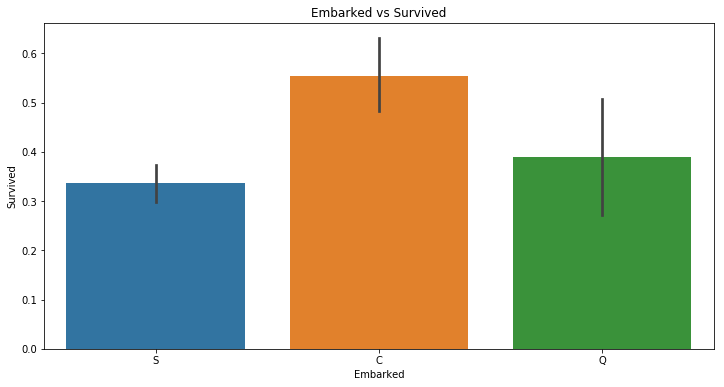

This shows that Embarked is an important feature to use: We should fill the missing values.


In [0]:
Embarked_tot = train.Embarked.value_counts(normalize=False,ascending=False,dropna=True)
Embarked_per = train.Embarked.value_counts(normalize=True,ascending=False,dropna=True)*100
Embarked_sur = pd.pivot_table(
    train,
    values='Survived',
    index='Embarked',
    #columns='Sex',
    aggfunc=np.sum,
    fill_value=None,
    margins=False,
    dropna=True,
    margins_name='All')
Embarked_train = pd.concat([Embarked_tot,Embarked_per,Embarked_sur.Survived, Embarked_sur.Survived/Embarked_tot],
                           axis=1,
                           keys=['Tot_Emb', 'Percent_Emb','Tot_Sur', 'Percent_Sur'],
                           sort=True).sort_values('Tot_Emb',ascending=False)
print(Embarked_train)
#pal = {'S':"Red", 'C':"Green",'Q':'Blue'}

fig, ax = plt.subplots(nrows=1,ncols=1,figsize = (12,6))
sns.barplot(
    x='Embarked',
    y='Survived',
    #hue='Sex',
    data=train,
#palette=pal
)
ax.set_title('Embarked vs Survived')
plt.show()
print("This shows that Embarked is an important feature to use: We should fill the missing values.")

        Total_sur  Percent_sur
Sex                           
female        233     0.742038
male          109     0.188908


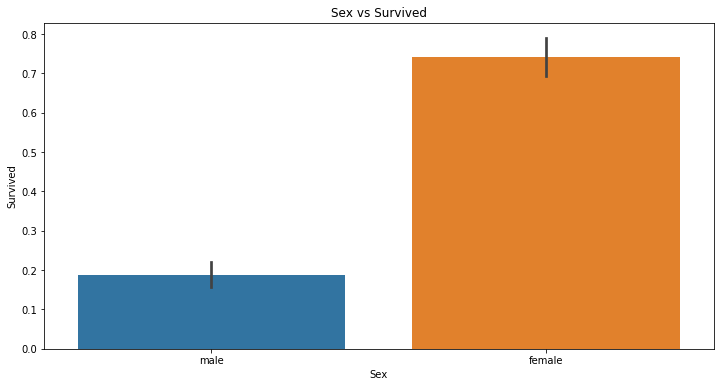

This shows that Sex is an very important feature.


In [0]:
Sex_train = pd.pivot_table(train, values='Survived', index='Sex', columns=None, aggfunc=[np.sum,'mean'])
Sex_train.columns = ['Total_sur','Percent_sur']
print(Sex_train)

fix, ax = plt.subplots(nrows=1,ncols=1,figsize = (12,6))
sns.barplot(
    x='Sex',
    y='Survived',
    #hue='Sex',
    data=train,
    #palette=pal
)
ax.set_title('Sex vs Survived')
plt.show()
print("This shows that Sex is an very important feature.")

          Total_sur  Percent_sur
Embarked                        
C                93         0.55
Q                30         0.39
S               217         0.34
Over all people embarked from C has higher survival rates
________________________________________

let us now see if this varies with Sex 

                 Total_sur  Percent_sur
Embarked Sex                           
C        female         64         0.88
         male           29         0.31
Q        female         27         0.75
         male            3         0.07
S        female        140         0.69
         male           77         0.17


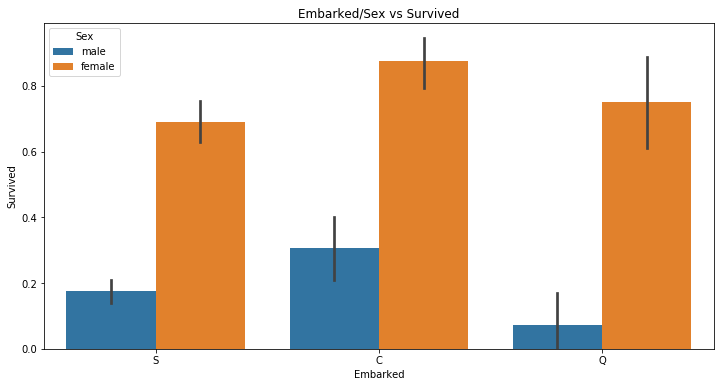

31% of the males Embarked from C survived (this is very high compared to males embarked from other ports)


In [0]:
temp = round(pd.pivot_table(train, values='Survived', index=['Embarked'], columns=None, aggfunc=[np.sum,'mean']),2)
temp.columns = ['Total_sur','Percent_sur']
print(temp)
print("Over all people embarked from C has higher survival rates")
print('_'*40+'\n')
print('let us now see if this varies with Sex \n')
Embarked_sex_train = pd.pivot_table(train, values='Survived', index=['Embarked','Sex'], columns=None, aggfunc=[np.sum,'mean'])
Embarked_sex_train.columns = ['Total_sur','Percent_sur']
Embarked_sex_train.reindex(index = ['S','C','Q'], level = 0)
print(round(Embarked_sex_train,2))

fix, ax = plt.subplots(nrows=1,ncols=1,figsize = (12,6))
sns.barplot(
    x='Embarked',
    y='Survived',
    hue='Sex',
    data=train,
    #palette=pal
)
ax.set_title('Embarked/Sex vs Survived')
plt.show()
print("31% of the males Embarked from C survived (this is very high compared to males embarked from other ports)")



        Total_sur  Percent_sur
Pclass                        
1             136         0.63
2              87         0.47
3             119         0.24


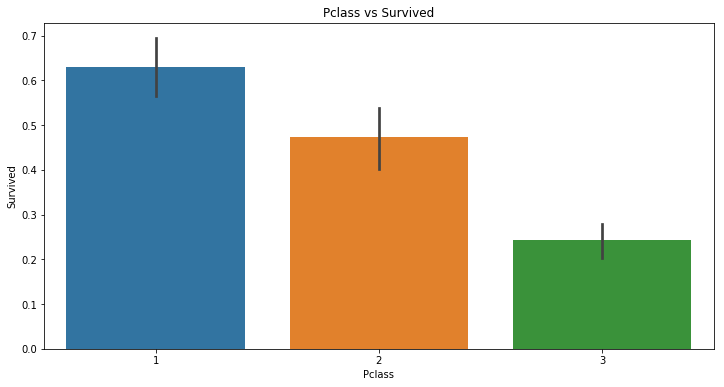

This shows that Pclass is also an important feature.


In [0]:
Pclass_train = pd.pivot_table(train, values='Survived', index='Pclass', columns=None, aggfunc=[np.sum,'mean'])
Pclass_train.columns = ['Total_sur','Percent_sur']
print(round(Pclass_train,2))

fix, ax = plt.subplots(nrows=1,ncols=1,figsize = (12,6))
sns.barplot(
    x='Pclass',
    y='Survived',
    #hue='Sex',
    data=train,
    #palette=pal
)
ax.set_title('Pclass vs Survived')
plt.show()
print("This shows that Pclass is also an important feature.")

               Total_sur  Percent_sur
Pclass Sex                           
1      female         91         0.97
       male           45         0.37
2      female         70         0.92
       male           17         0.16
3      female         72         0.50
       male           47         0.14


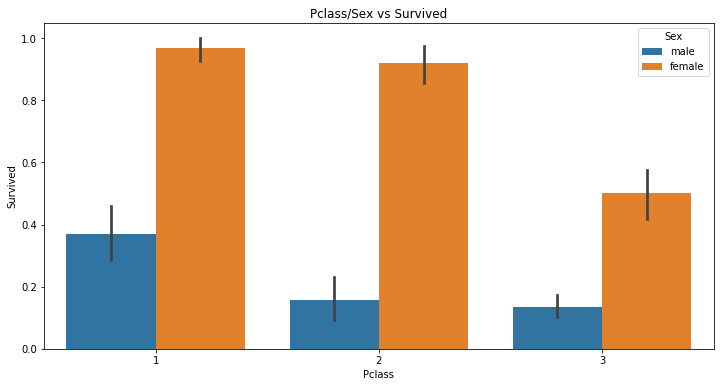

96.8% of the 1st class females survived!
Let us check if there is a correlation between Embarked, Sex, Survival


In [0]:
Pclass_sex_train = pd.pivot_table(train, values='Survived', index=['Pclass','Sex'], columns=None, aggfunc=[np.sum,'mean'])
Pclass_sex_train.columns = ['Total_sur','Percent_sur']
print(round(Pclass_sex_train,2))

fix, ax = plt.subplots(nrows=1,ncols=1,figsize = (12,6))
sns.barplot(
    x='Pclass',
    y='Survived',
    hue='Sex',
    data=train,
    #palette=pal
)
ax.set_title('Pclass/Sex vs Survived')
plt.show()
print("96.8% of the 1st class females survived!")
print("Let us check if there is a correlation between Embarked, Sex, Survival")

          mean            
Pclass       1     2     3
Embarked                  
C         0.69  0.53  0.38
Q         0.50  0.67  0.38
S         0.58  0.46  0.19
Let us Visualize this with point plots
________________________________________



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


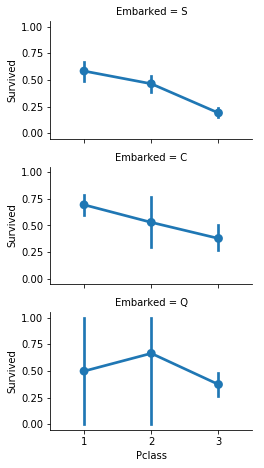

I assumed that as the Pclass increases the survival rate decreases. However, this changes for people embarked from Q.
Let us add Sex into this and see!


In [0]:
temp = round(pd.pivot_table(train, values='Survived', index=['Embarked'], columns='Pclass', aggfunc=['mean']),2)
print(temp)

print("Let us Visualize this with point plots")
print('_'*40+'\n')

grid =sns.FacetGrid(
    train,
    row='Embarked',
    height=3,
    palette=None,
    row_order=None,
    col_order=['1','2','3'],
    dropna=True,
    legend_out=True,
    despine=True,
    margin_titles=False,size=2.2, aspect=1.6
)
grid.map(sns.pointplot, 'Pclass','Survived', alpha=.5)
grid.add_legend();
plt.show()
print("I assumed that as the Pclass increases the survival rate decreases. However, this changes for people embarked from Q.")
print("Let us add Sex into this and see!")

the fllowing table illustrate the correlations between all the four Catagorical Feature:
Pclass, Embarked, Sex, Survival
________________________________________________________________________________

                travelled          survived          mean            
Pclass                  1   2    3        1   2   3     1     2     3
Embarked Sex                                                         
C        female        43   7   23       42   7  15  0.98  1.00  0.65
         male          42  10   43       17   2  10  0.40  0.20  0.23
Q        female         1   2   33        1   2  24  1.00  1.00  0.73
         male           1   1   39        0   0   3  0.00  0.00  0.08
S        female        48  67   88       46  61  33  0.96  0.91  0.38
         male          79  97  265       28  15  34  0.35  0.15  0.13
________________________________________________________________________________

Above, on the left we have total number of passengers, on the middle the survived one

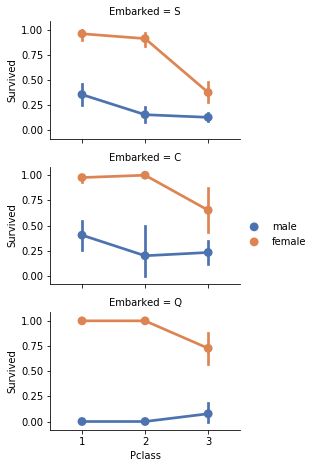

Only 2 first class and 3 second class passengers Embarked from Q 
Out of 41 males Embarked from Q  only 3 had survived
a


In [0]:
print("the fllowing table illustrate the correlations between all the four Catagorical Feature:")
print("Pclass, Embarked, Sex, Survival")
print('_'*80+'\n')

temp = round(pd.pivot_table(train, 
                            values='Survived', 
                            index=['Embarked','Sex'], 
                            columns='Pclass', 
                            aggfunc=[lambda x: len(x), np.sum,'mean'] ),2)

temp.rename(columns={'sum':'survived','<lambda>': 'travelled'}, inplace=True)
print(temp)
print('_'*80+'\n')
print("Above, on the left we have total number of passengers, on the middle the survived ones, \nand finally on the right we have the (mean)propabilities for survival.")
print('_'*80+'\n')

#grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep', order = [1,2,3], hue_order = ['male','female'])
grid.add_legend()
plt.show()

print('Only 2 first class and 3 second class passengers Embarked from Q ')
print("Out of 41 males Embarked from Q  only 3 had survived")
print("a")

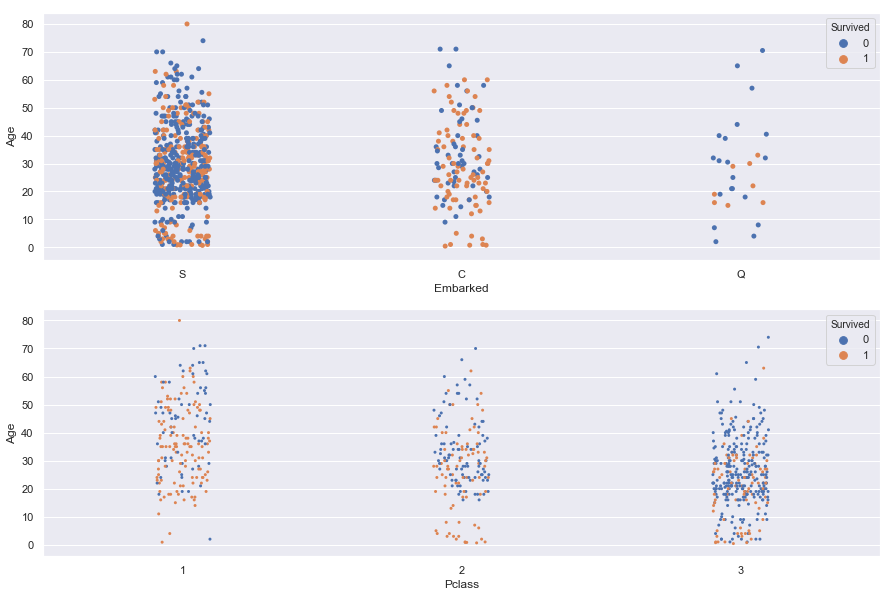

All the people Embarked from Q with Age>35 did not survive
All the people Embarked from Q with Age<10 did not survive
All the people Embarked from C with Age<10 survived
----------------------------------------
All the second class people with age< 18 (approx) have survived
----------------------------------------
Most class 3 have died and most people embarked from S have died. There might be a good correlation.
Most of the old people with age > 65 (approx) have not survived


In [0]:
# Make a strip plot of 'hp' grouped by 'cyl'
sns.set()
plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
plt.subplot(2,1,1)
sns.stripplot(x='Embarked', y='Age',hue='Survived', data=train)

# Make the strip plot again using jitter and a smaller point size
plt.subplot(2,1,2)
sns.stripplot(x='Pclass', y= 'Age',hue='Survived', data=train, size =3, jitter =True)
#plt.title("Emabrked/Survived vs Age")
# Display the plot
plt.show()


print("All the people Embarked from Q with Age>35 did not survive")
print("All the people Embarked from Q with Age<10 did not survive")
print("All the people Embarked from C with Age<10 survived")
print("-"*40)
print("All the second class people with age< 18 (approx) have survived")
print("-"*40)
print("Most class 3 have died and most people embarked from S have died. There might be a good correlation.")
print("Most of the old people with age > 65 (approx) have not survived")


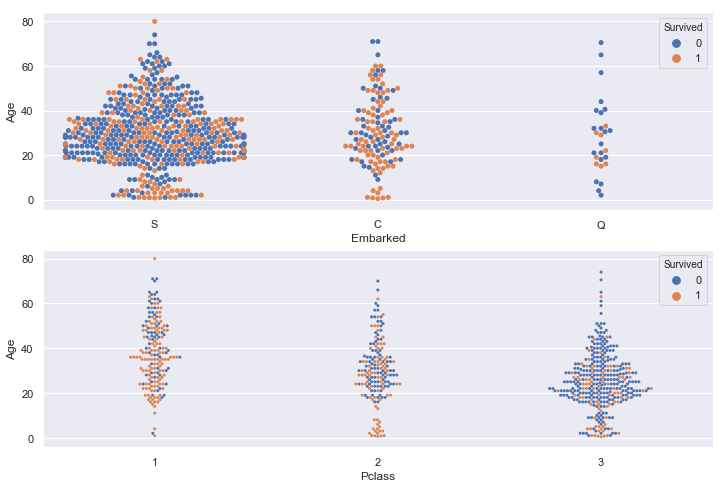

A lot of Class 1 people with Age < 20 have survived
Particularly no new information


In [0]:
# Make a strip plot of 'hp' grouped by 'cyl'
plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
plt.subplot(2,1,1)
sns.swarmplot(x='Embarked', y='Age',hue='Survived', data=train)

# Make the strip plot again using jitter and a smaller point size
plt.subplot(2,1,2)
sns.swarmplot(x='Pclass', y= 'Age', data=train,hue='Survived', size =3)

# Display the plot
plt.show()

print("A lot of Class 1 people with Age < 20 have survived")
print("Particularly no new information")

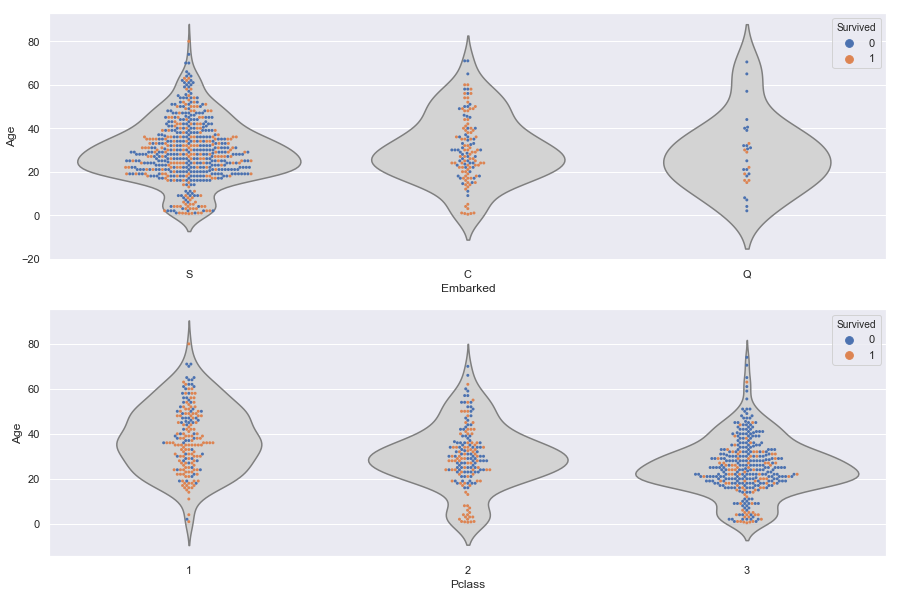

In [0]:
# Make a strip plot of 'hp' grouped by 'cyl'
plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
plt.subplot(2,1,1)
sns.violinplot(x='Embarked', y='Age', data=train, inner =None, color='lightgray')
sns.swarmplot(x='Embarked',y='Age',data=train, size=3,hue='Survived')

# Make the strip plot again using jitter and a smaller point size
plt.subplot(2,1,2)
sns.violinplot(x='Pclass', y= 'Age', data=train,  inner =None, color='lightgray')
sns.swarmplot(x='Pclass',y='Age',data=train, size=3,hue='Survived')
# Display the plot
plt.show()

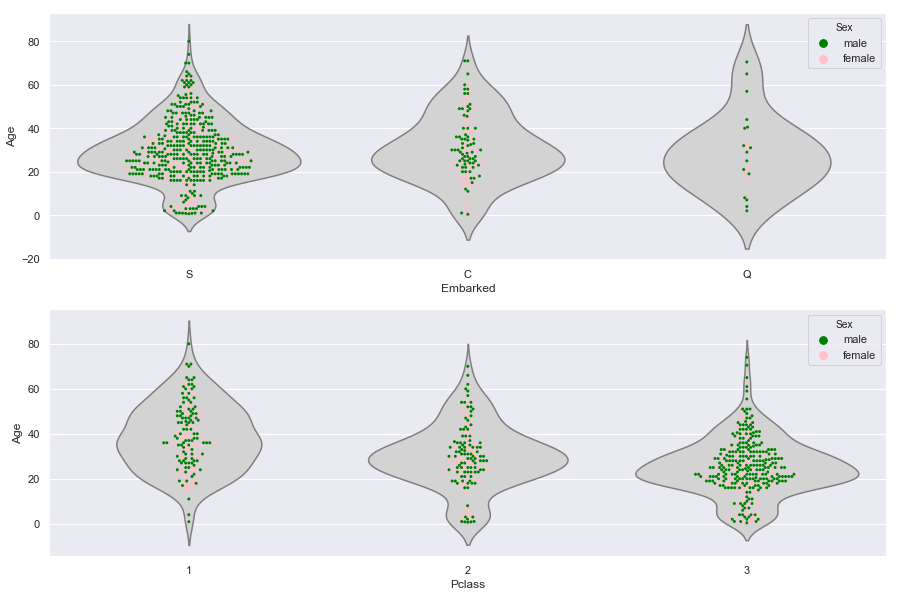

A lot of female passengers in Class 1 with Age<20
these might be the ones which we saw ealier that survied
let us verify this


In [0]:
# Make a strip plot of 'hp' grouped by 'cyl'
pal = {'male':"green", 'female':"Pink"}
plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
plt.subplot(2,1,1)
sns.violinplot(x='Embarked', y='Age', data=train, inner =None, color='lightgray')
sns.swarmplot(x='Embarked',y='Age',data=train, size=3,hue='Sex',palette=pal)

# Make the strip plot again using jitter and a smaller point size
plt.subplot(2,1,2)
sns.violinplot(x='Pclass', y= 'Age', data=train,  inner =None, color='lightgray')
sns.swarmplot(x='Pclass',y='Age',data=train, size=3,hue='Sex',palette=pal)
# Display the plot
plt.show()

print("A lot of female passengers in Class 1 with Age<20")
print("these might be the ones which we saw ealier that survied")
print("let us verify this")

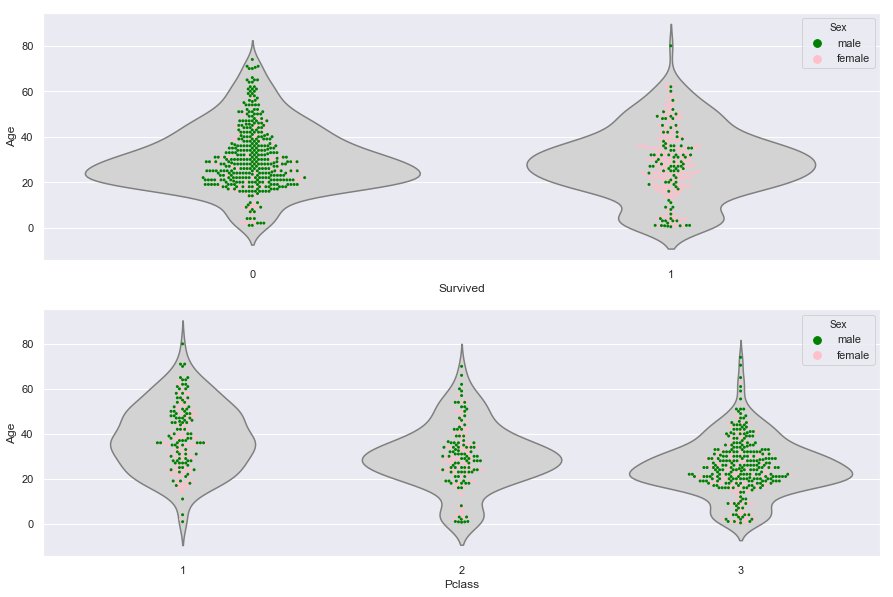

In [0]:
# Make a strip plot of 'hp' grouped by 'cyl'
pal = {'male':"green", 'female':"Pink"}
plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
plt.subplot(2,1,1)
sns.violinplot(x='Survived', y='Age', data=train, inner =None, color='lightgray')
sns.swarmplot(x='Survived',y='Age',data=train, size=3,hue='Sex',palette=pal)

# Make the strip plot again using jitter and a smaller point size
plt.subplot(2,1,2)
sns.violinplot(x='Pclass', y= 'Age', data=train,  inner =None, color='lightgray')
sns.swarmplot(x='Pclass',y='Age',data=train, size=3,hue='Sex',palette=pal)
# Display the plot
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


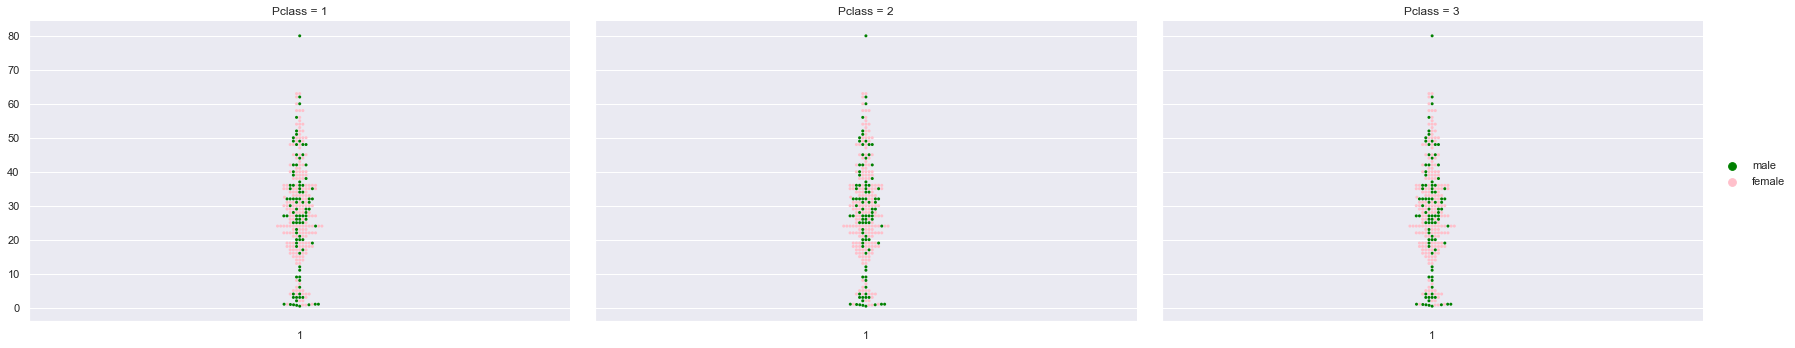

In [0]:
#grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train, col='Pclass', height=2.2, aspect=1.6,size=5)
grid.map(sns.swarmplot, x='Survived',y='Age',data=train, size=3, hue='Sex',palette=pal, order = [1], hue_order = ['male','female'])
grid.add_legend()
plt.show()

In [0]:
print("No of people travelled")
temp = round(pd.pivot_table(train, 
                            values='Age', 
                            index=['Pclass','Sex'], 
                            columns=['Embarked'], 
                            aggfunc=[(lambda x: len(x))] ),2)
temp.rename(columns={'<lambda>': '#of obervations '}, inplace=True)
temp.columns=['C','Q','S']
temp_col = pd.Categorical(['S','C','Q'],ordered =True)
temp.reindex(temp_col, axis = 'columns')
print(temp)
print('-'*40)
print("Missing values in Age column")
temp = round(pd.pivot_table(train, 
                            values='Age', 
                            index=['Pclass','Sex'], 
                            columns=['Embarked'], 
                            aggfunc=[(lambda x: sum(x.isnull()))] ),2)
temp.rename(columns={'<lambda>': '#NAN-in-Age '}, inplace=True)
temp.columns=['C','Q','S']
temp.reindex(['S','C','Q'],axis = 'columns')
print(temp)
print('-'*40)
print("Median Age")
temp = round(pd.pivot_table(train, 
                            values='Age', 
                            index=['Pclass','Sex'], 
                            columns=['Embarked'], 
                            aggfunc=[(lambda x: x.quantile()),'mean'] ),2)
temp.rename(columns={'<lambda>': 'Median'}, inplace=True)
#temp.columns=['C','Q','S']
#temp.reindex(['S','C','Q'],axis = 'columns')
print(temp)
print('-'*40)


No of people travelled
                  C     Q      S
Pclass Sex                      
1      female  43.0   1.0   48.0
       male    42.0   1.0   79.0
2      female   7.0   2.0   67.0
       male    10.0   1.0   97.0
3      female  23.0  33.0   88.0
       male    43.0  39.0  265.0
----------------------------------------
Missing values in Age column
                  C     Q     S
Pclass Sex                     
1      female   5.0   0.0   4.0
       male     6.0   0.0  15.0
2      female   0.0   1.0   1.0
       male     2.0   0.0   7.0
3      female   7.0  23.0  12.0
       male    18.0  25.0  51.0
----------------------------------------
Median Age
              Median               mean              
Embarked           C     Q     S      C      Q      S
Pclass Sex                                           
1      female  37.00  33.0  33.0  36.05  33.00  32.70
       male    36.50  44.0  42.0  40.11  44.00  41.90
2      female  22.00  30.0  29.0  19.14  30.00  29.72
       male

Histograms


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


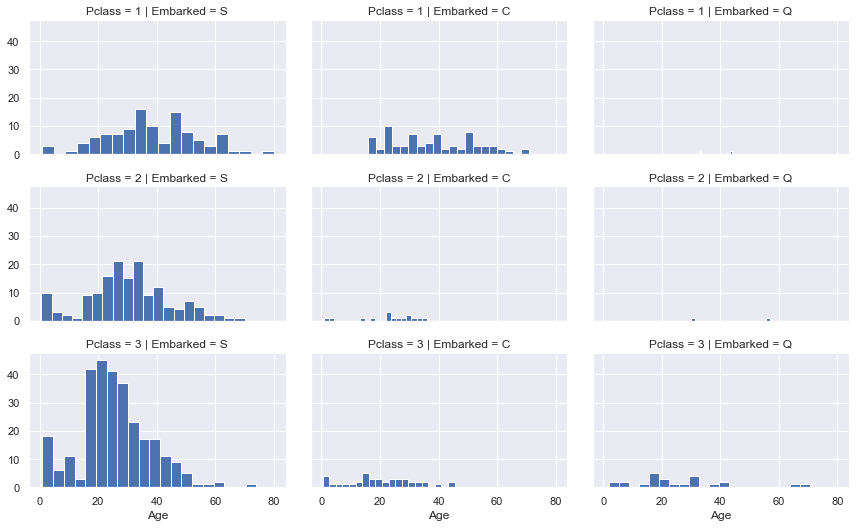

In [0]:
print("Histograms")
grid = sns.FacetGrid(train, row='Pclass', col = 'Embarked', size=2.5, aspect=1.6)
grid.map(plt.hist, 'Age',bins =20)
grid.add_legend()
plt.show()

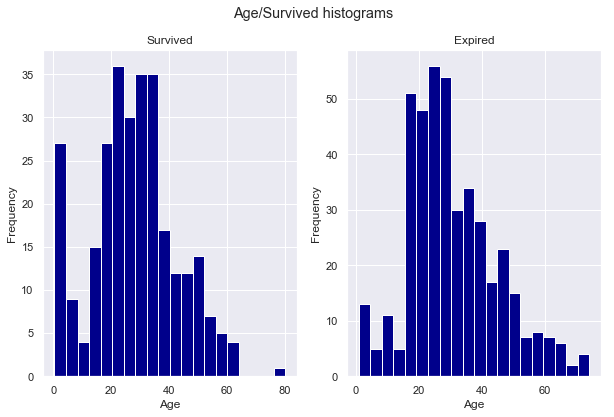

it looks like there is a pattern with kids and old people
Let us accuratly calculate the bin widths, by looking at the age bin widths using traditional histograms


In [0]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
train[train.Survived==1].Age.hist( ax = axes[0], color = 'darkblue',bins=20)
train[train.Survived==0].Age.hist(ax = axes[1], color = 'darkblue',bins=20)
axes[0].set_title("Survived")
axes[1].set_title("Expired")
axes[0].set_xlabel("Age")
axes[1].set_xlabel("Age")
axes[0].set_ylabel("Frequency")
axes[1].set_ylabel("Frequency")
# Setting the ylabel to '% change'
# ... YOUR CODE FOR TASK 7 ...
#axes[0].set_ylabel('# change')
#axes[1].set_ylabel('% change')
plt.suptitle('Age/Survived histograms')
plt.show()

print("it looks like there is a pattern with kids and old people")
print("Let us accuratly calculate the bin widths, by looking at the age bin widths using traditional histograms")


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


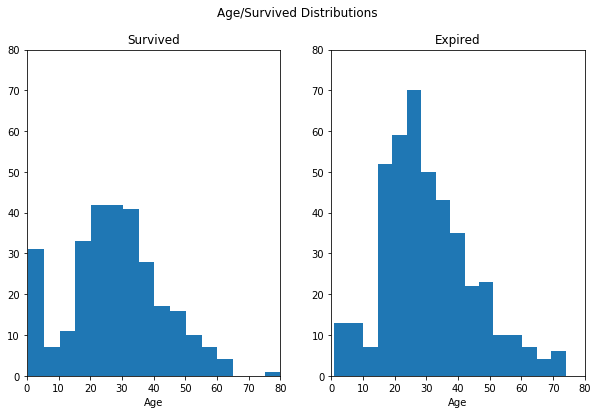

# people Survived - # of people Expired
[31.  7. 11. 33. 42. 42. 41. 28. 17. 16. 10.  7.  4.  0.  0.  1.]
[13. 13.  7. 52. 59. 70. 50. 43. 35. 22. 23. 10. 10.  7.  4.  6.]
[ 18.  -6.   4. -19. -17. -28.  -9. -15. -18.  -6. -13.  -3.  -6.  -7.
  -4.  -5.]
--------------------------------------------------------------------------------
There are three import observations here
(1): An 80year old person survived, I think its safe to assume he/she is an outlier.
(2): After removing him, we can see that everyone above 65years have expired.
(3): Kids below 5years had a great chance of survival
* Apart from these catogories I dont see any clear differences.
** If we can find the moms of these babies, mostly she should have survived. But we dont have the data.
--------------------------------------------------------------------------------


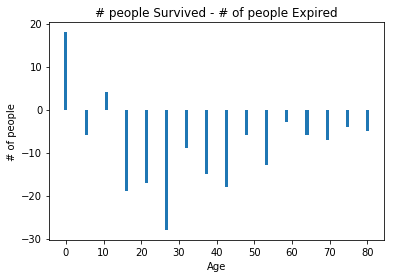

In [0]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
temp1 = axes[0].hist(train[train.Survived==1].Age, bins=16)
temp2 = axes[1].hist(train[train.Survived==0].Age, bins=16)
axes[0].set_xlabel('Age')
axes[1].set_xlabel('Age')
axes[1].set_title('Expired')
axes[0].set_title('Survived')
axes[0].set_xlim([0,80])
axes[1].set_xlim([0,80])
axes[0].set_ylim([0,80])
axes[1].set_ylim([0,80])
plt.suptitle('Age/Survived Distributions')
plt.show()

print("# people Survived - # of people Expired")
print(temp1[0])
print(temp2[0])
print(temp1[0]-temp2[0])
print('-'*80)

plt.bar(np.linspace(0,80,16),temp1[0]-temp2[0])
plt.title("# people Survived - # of people Expired")
plt.xlabel("Age")
plt.ylabel('# of people')
print('There are three import observations here')
print('(1): An 80year old person survived, I think its safe to assume he/she is an outlier.')
print('(2): After removing him, we can see that everyone above 65years have expired.')
print('(3): Kids below 5years had a great chance of survival')
print('* Apart from these catogories I dont see any clear differences.')
print('** If we can find the moms of these babies, mostly she should have survived. But we dont have the data.')

print('-'*80)

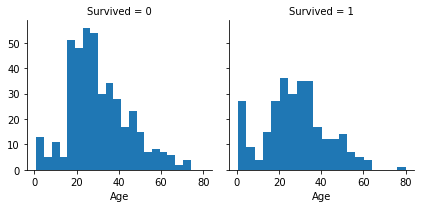

In [0]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)
plt.show()

In [0]:
temp = round(pd.pivot_table(train, 
                            values='Age', 
                            index=['Embarked','Sex'], 
                            columns=['Survived','Pclass'], 
                            aggfunc=[lambda x: len(x)] ),2)
temp.rename(columns={'sum':'survived','<lambda>': 'travelled'}, inplace=True)
print(temp)

                travelled                               
Survived                0                  1            
Pclass                  1     2      3     1     2     3
Embarked Sex                                            
C        female       1.0   NaN    8.0  42.0   7.0  15.0
         male        25.0   8.0   33.0  17.0   2.0  10.0
Q        female       NaN   NaN    9.0   1.0   2.0  24.0
         male         1.0   1.0   36.0   NaN   NaN   3.0
S        female       2.0   6.0   55.0  46.0  61.0  33.0
         male        51.0  82.0  231.0  28.0  15.0  34.0


         Excluding NAN      Including NAN       
Survived             0    1             0      1
Pclass                                          
1                   64  122          80.0  136.0
2                   90   83          97.0   87.0
3                  270   85         372.0  119.0
----------------------------------------
Histograms


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


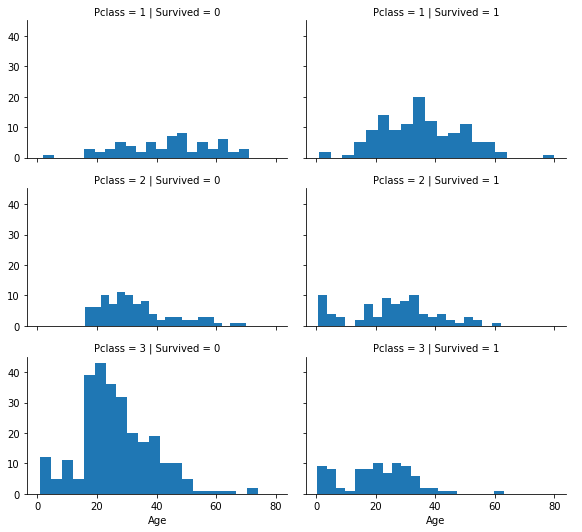

----------------------------------------
Normalized distributions


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


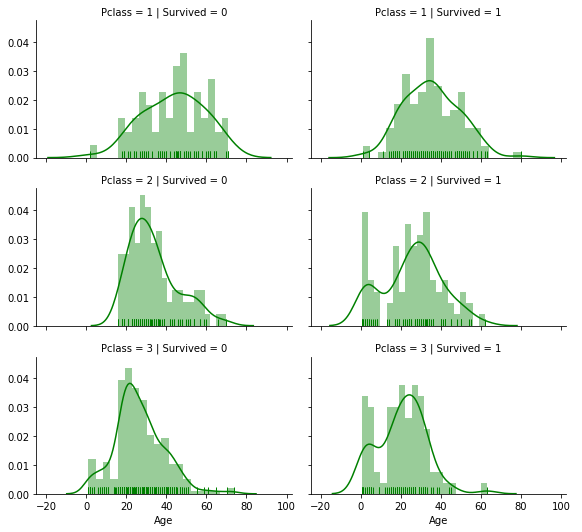

In [0]:
temp = round(pd.pivot_table(train, 
                            values='Age', 
                            index=['Pclass'], 
                            columns=['Survived'], 
                            aggfunc=['count',lambda x: len(x)] ),2)
temp.rename(columns={'count':'Excluding NAN','<lambda>': 'Including NAN'}, inplace=True)
print(temp)
print('-'*40)

print("Histograms")
grid = sns.FacetGrid(train, row='Pclass', col = 'Survived', size=2.5, aspect=1.6)
grid.map(plt.hist, 'Age',bins =20)
grid.add_legend()
plt.show()
print('-'*40)
print("Normalized distributions")
grid = sns.FacetGrid(train, row='Pclass', col = 'Survived', size=2.5, aspect=1.6)
grid.map(sns.distplot, 'Age',color = 'g',bins=20,rug=True)
grid.add_legend()
plt.show()

         Excluding NAN      Including NAN       
Survived             0    1             0      1
Embarked                                        
C                   51   79          75.0   93.0
Q                   20    8          47.0   30.0
S                  353  201         427.0  217.0
----------------------------------------
Histograms


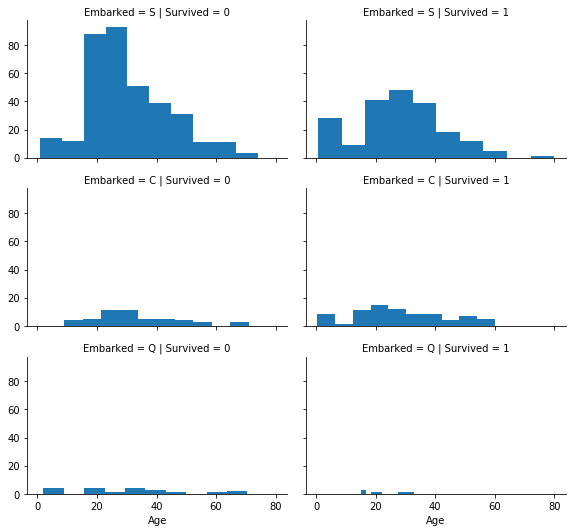

----------------------------------------
Normalized distributions


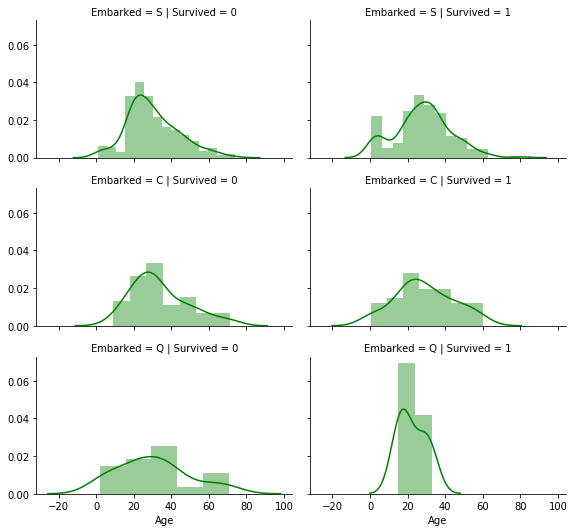

In [0]:
temp = round(pd.pivot_table(train, 
                            values='Age', 
                            index=['Embarked'], 
                            columns=['Survived'], 
                            aggfunc=['count',lambda x: len(x)] ),2)
temp.rename(columns={'count':'Excluding NAN','<lambda>': 'Including NAN'}, inplace=True)
print(temp)
print('-'*40)
print("Histograms")
grid = sns.FacetGrid(train, row='Embarked', col = 'Survived', height=2.5, aspect=1.6)
grid.map(plt.hist, 'Age')
grid.add_legend()
plt.show()
print('-'*40)
print("Normalized distributions")
grid = sns.FacetGrid(train, row='Embarked', col = 'Survived', height=2.5, aspect=1.6)
grid.map(sns.distplot, 'Age',color = 'g')
grid.add_legend()
plt.show()

In [0]:
temp = round(pd.pivot_table(train, 
                            values='Age', 
                            index=['Pclass'], 
                            columns=['Embarked'], 
                            aggfunc=[lambda x: sum(x.isnull())] ),2)
temp.rename(columns={'<lambda>': '#NAN-in-Age '}, inplace=True)
print(temp)
print('-'*40)

         #NAN-in-Age             
Embarked            C     Q     S
Pclass                           
1                11.0   0.0  19.0
2                 2.0   1.0   8.0
3                25.0  48.0  63.0
----------------------------------------
